# [LABORATORIO] Anova & Tukey

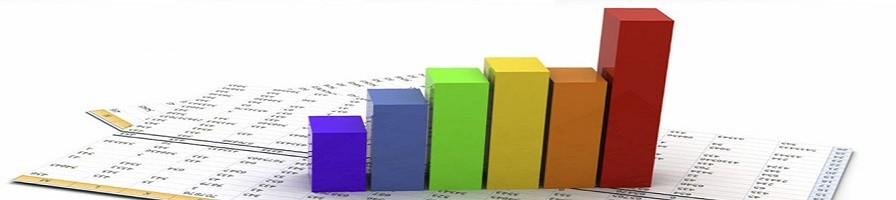
_________________________________________________________________________________________________________________


# CONTEXTO
<hr>

ANOVA, surge como una generalización del contraste para dos medias de la t de Student, cuando el número de muestras a contrastar es mayor que dos.
Necesitamos poder comparar simultáneamente todas las medias: el test que lo permite es el test ANOVA (de **AN**alysis **O**f **VA**riance). Como su nombre indica, compara varianzas aunque lo que contrastamos sean medias.
Para ello parte de requisitos previos:

-  La población debe estar cerca de una distribución normal .
-  Las muestras deben ser independientes.
-  Las variaciones poblacionales deben ser iguales.
-  Los grupos deben tener tamaños de muestra iguales 

Hay dos tipos principales: 
-  unidireccional
-  bidireccional.Pueden ser con o sin replicación.

Donde:
-  ANOVA unidireccional entre grupos: se usa cuando quieres probar dos grupos para ver si hay una diferencia entre ellos.
-  ANOVA de dos vías sin replicación: se usa cuando tienes un grupo y estás probando dos veces ese mismo grupo. Por ejemplo, está probando un grupo de personas antes y después de tomar un medicamento para ver si funciona o no.
-  ANOVA bidireccional con replicación: dos grupos , y los miembros de esos grupos están haciendo más de una cosa . Por ejemplo, dos grupos de pacientes de diferentes hospitales que prueban dos terapias diferentes


## El valor F en ANOVA
<hr>
El valor F de una manera ANOVA es una "herramienta" para ayudarlo a responder la pregunta: **"¿Es la diferencia entre las medias de dos poblaciones significativamente diferente ?"**

El valor F en la prueba ANOVA también determina el valor P (*p-valor*): el *p-valor* es la probabilidad de obtener un resultado al menos tan extremo como el que se observó realmente, dado que la hipótesis nula es verdadera.

El valor p es una probabilidad, mientras que la razón f es una estadística de prueba, calculada como:

Valor F = varianza de las medias del grupo ( Cuadrado medio entre ) / media de las varianzas dentro del grupo ( Error cuadrático medio )



## ¿Cuándo rechazo la hipótesis nula ?

Si queremos saber si el valor F de regresión es significativo, debemos buscar el valor crítico en la tabla f. 

Por ejemplo, en un ANOVA unidireccional simple entre grupos,
-  Dfn = a - 1
-  dfd = N - a

dónde:
-  a = el número de grupos
-  N = el número total de sujetos en el experimento

Los grados de libertad en el denominador (dfd) también se conocen como los grados de error de libertad (dfe).
 
La distribución F también se llama **F de Snedecor, F de Fisher o distribución de Fisher-Snedecor**

La tabla de estadísticas F es en realidad una colección de tablas. La tabla específica que se use dependerá del nivel alfa. 

Por ejemplo, si tenemos un nivel alfa de .05, entonces su área de cola derecha es .05 (5 por ciento), y buscará el valor crítico f en la tabla de nivel alfa = .05 . Las filas en la tabla de distribución F representan grados de libertad del denominador y las columnas representan grados de libertad del numerador.

Una vez denotado/buscado/encontrado el valor F, lo comparamos con un valor crítico f en la tabla. 
Si su valor observado de F es mayor que el valor de la tabla F, puede rechazar la hipótesis nula con un 95 por ciento de confianza de que la variación entre sus dos poblaciones no se debe a una posibilidad aleatoria.

**Por ejemplo**
Para determinar el valor crítico de (alfa .10) f para una distribución F con 6 y 6 grados de libertad, busque en la columna 6 (numerador) y la fila 6 (denominador) de la Tabla F para alfa = .10. F (.10, 6, 6) = 3.054

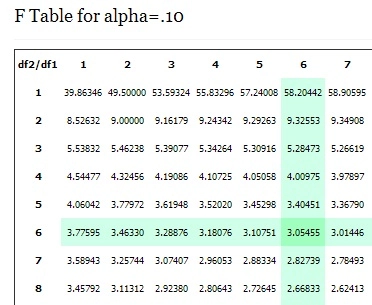


## __[PROBLEMA PROPUESTO]__ **Los tres arqueros** 
<hr>
Pat, Jack y Alex participan en un concurso de tiro con arco. 

Están disparando a objetivos con 10 anillos concéntricos espaciados uniformemente. Los anillos tienen valores de puntaje del 1 al 10 asignados a ellos, siendo 10 el más alto. 

Cada participante dispara 6 flechas, anotando los siguientes puntos:
- Pat - 5, 4, 4, 3, 9, 4
- Jack - 4, 8, 7, 5, 1, 5
- Alex - 9, 9, 8, 10, 4, 10

En base a los resultados anteriores, nos gustaría saber **quién es el mejor arquero**. 
Por ello, nuestra **hipótesis nula** es que las medias de **todas las poblaciones son iguales**

Ho: $\mu_1$=$\mu_2$=$\mu_3$

Rechazar la hipótesis nula significaría que hay una diferencia significativa entre al menos dos de los arqueros.

La decisión de rechazar la hipótesis nula y aceptar la hipótesis alternativa se basa en el nivel de significación de la prueba y la probabilidad de observar el efecto dado que la hipótesis nula es verdadera (-valor). 
Si se descarta la hipótesis nula. Normalmente usamos un valor de , que corresponde al 95% de confianza.


__[SOLUCIÓN]__ 

Usar ANOVA unidireccional en Python es bastante sencillo: 

la función f_oneway de SciPy realiza un ANOVA unidireccional y devuelve los valores F y p de la prueba. Podemos usar el siguiente código para ejecutar el análisis contra los conjuntos de datos de nuestro ejemplo.

-  https://scipy.org/
-  https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html

In [10]:
# import numpy as np
from scipy import stats
 
data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])
 
f, p = stats.f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('              ANOVA Unidireccional                 ')
print ('==========================================================================')
 
print ('F value (El valor F calculado de la prueba):       ', f)
print ('P value (El valor p asociado de la distribución F):', p, '\n')
print ('==========================================================================')

              ANOVA Unidireccional                 
F value (El valor F calculado de la prueba):        4.999999999999998
P value (El valor p asociado de la distribución F): 0.021683749320078414 



__[CONCLUSIÓN]__

Rechazamos la hipótesis nula y por ende, concluimos que al menos una de las medias es diferente de al menos otra media de la población: no todos los arqueros tienen el mismo rendimiento

# Y AHORA QUÉ ????

Lo que ocurre con ANOVA unidireccional es que, aunque ahora sabemos que hay una diferencia en el rendimiento de los arqueros, no sabemos exactamente quién se desempeña mejor o peor

## TUKEY
<hr>

La prueba de rango de Tukey, es un método común utilizado como **análisis post hoc** después de ANOVA unidireccional. 

Esta prueba compara todos los pares posibles y podemos usarla para identificar con precisión la diferencia entre dos medios que es mayor que el error estándar esperado.

Vamos a usar la biblioteca statsmodels que proporciona una implementación fácil de usar de la prueba de rango de Tukey.
-  http://www.statsmodels.org/stable/index.html
-  http://www.statsmodels.org/stable/stats.html#module-statsmodels.stats.multicomp
-  http://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html#statsmodels.stats.multicomp.pairwise_tukeyhsd
-  http://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html#statsmodels.sandbox.stats.multicomp.MultiComparison

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Alex   Jack  -3.3333 0.0435 -6.5755 -0.0911   True
  Alex    Pat     -3.5 0.0337 -6.7422 -0.2578   True
  Jack    Pat  -0.1667    0.9 -3.4089  3.0755  False
----------------------------------------------------


### Explicación

Hemos detener presente que la función tukeyhsd() tiene un parámetro llamado alfa , que no estamos configurando explícitamente ya que estamos contentos con su valor predeterminado (alfa = 0.05)
http://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html#statsmodels.stats.multicomp.pairwise_tukeyhsd

-  Los resultados anteriores revelan que Alex (grupo 0) difiere significativamente de los otros dos arqueros. 
-  La tercera columna nos dice que hay evidencia significativa para rechazar la hipótesis nula para los grupos Alex-Jack (0-1) y Alex-Pat (0-2).
-  La prueba también muestra la diferencia entre las medias del grupo (la columna meandiff)
-  Esto lleva a la conclusión de que Alex es el mejor arquero del grupo.

# Estudiar
<hr>
http://www.statsoft.com/Textbook/ANOVA-MANOVA

ANOVA prueba las diferencias entre medias . MANOVA es solo un ANOVA con varias variables dependientes. Es similar a muchas otras pruebas y experimentos, ya que su propósito es averiguar si la variable de respuesta (es decir, su variable dependiente) se modifica manipulando la variable independiente. El examen ayuda a responder muchas preguntas de investigación, que incluyen:

-  ¿Los cambios en las variables independientes tienen efectos estadísticamente significativos en las variables dependientes?
-  ¿Cuáles son las interacciones entre variables dependientes?
-  ¿Cuáles son las interacciones entre variables independientes?

https://www.monografias.com/trabajos91/prueba-hipotesis-f-fisher-empleando-excel-y-winstats/prueba-hipotesis-f-fisher-empleando-excel-y-winstats.shtml